In [1]:
# get latest code changes automatically

%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys 


path = os.path.abspath('')
root = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(root)


from diffusion_policy.dataset.real_image_dataset import RealImageDataset
from torchvision.transforms import ColorJitter, RandomResizedCrop


/home/tlips/.conda/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
n_latency_steps = 0
n_obs_steps = 2
n_action_steps = 8
horizon = 16

dataset_path = "/home/tlips/Code/diffusion_policy/data/demo_place-cb-val"
shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [9],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [7]
    }
}

from omegaconf import OmegaConf
shape_meta = OmegaConf.create(shape_meta)

dataset = RealImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps,
                            use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=True, 
                                image_transforms=[RandomResizedCrop((240,320),scale=(0.9,0.9),ratio=(1,1)), ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)]
)



Acquiring lock on cache.
Loading cached ReplayBuffer from Disk.
Loaded!
image_keys: ['camera_0', 'camera_1']


In [5]:
normalizer = dataset.get_normalizer()

iterating dataset to get normalization: 100%|██████████| 14/14 [00:00<00:00, 21.24it/s]


In [6]:
normalizer["action"].params_dict["offset"]

Parameter containing:
tensor([-0.3540,  0.2412,  0.2162,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.3304])

In [75]:
batch = dataset[3]

camera_0 torch.Size([2, 3, 240, 320])
camera_1 torch.Size([2, 3, 240, 320])
robot_eef_pose_6d_rot torch.Size([2, 9])
gripper_width torch.Size([2, 1])


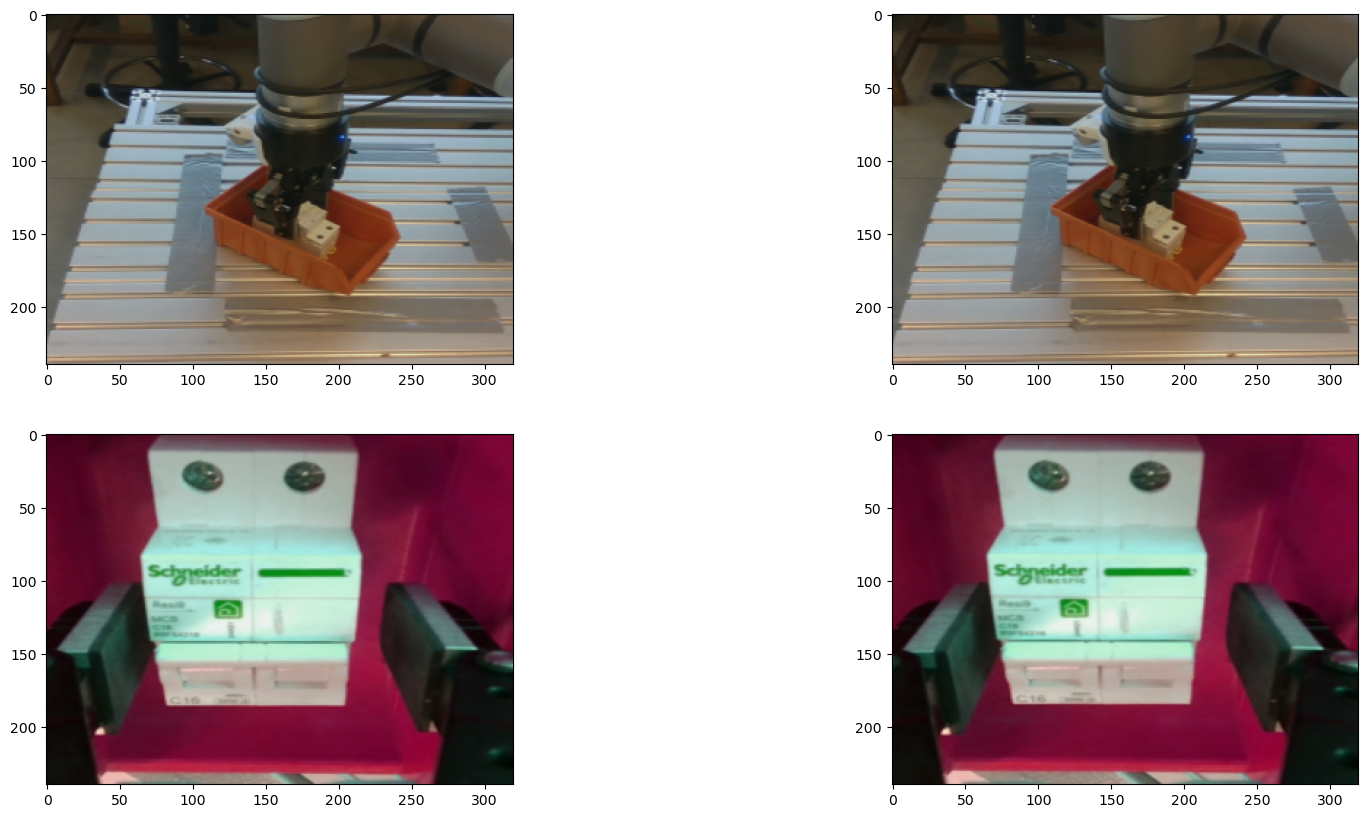

In [99]:
# display a batch of images

import matplotlib.pyplot as plt
import numpy as np

batch = dataset[110]
obs = batch["obs"]
action = batch["action"]
for k,v in obs.items():
    print(k, v.shape)
fig, axs = plt.subplots(2, n_obs_steps, figsize=(20, 10))

for i in range(n_obs_steps):
    img = obs["camera_0"][i].permute(1, 2, 0).numpy()
    axs[0, i].imshow(img)

    img = obs["camera_1"][i].permute(1, 2, 0).numpy()
    axs[1, i].imshow(img)



torch.Size([16, 7])


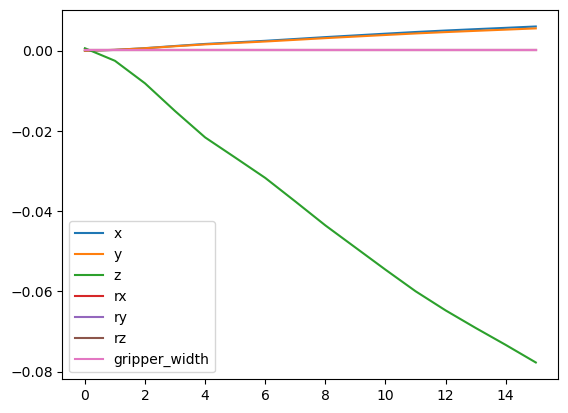

In [100]:
# plot the actions 
print(action.shape)
plt.plot(action)
# plt.legend(["x", "y", "z", "rxx","rxy","rxz","ryx","ryy","ryz", "gripper_width"])
plt.legend(["x","y","z","rx","ry","rz","gripper_width"])
plt.show()

In [81]:
print(obs["robot_eef_pose_6d_rot"])
print(obs["gripper_width"])



tensor([[ 0.0712, -0.3502,  0.3238,  0.8764,  0.4419,  0.1916,  0.3960, -0.8875,
          0.2356],
        [ 0.0744, -0.3502,  0.3238,  0.8600,  0.4730,  0.1917,  0.4275, -0.8728,
          0.2356]])
tensor([[0.0333],
        [0.0333]])


tensor([ 2.1905e-04,  1.0404e-04,  2.1815e-05,  1.3531e-04,  6.0618e-05,
        -2.3737e-03, -3.3261e-02])
tensor([ 2.7559e-03,  1.4994e-03,  5.8725e-04,  1.3419e-04,  6.3047e-05,
        -3.8374e-02, -3.3261e-02])
tensor([ 5.2928e-03,  2.8948e-03,  1.1527e-03,  1.3305e-04,  6.5462e-05,
        -7.4494e-02, -3.3261e-02])


## Test relative action representations

In [123]:
n_latency_steps = 0
n_obs_steps = 2
n_action_steps = 8
horizon = 16

dataset_path = "/home/tlips/Code/diffusion_policy/data/demo_place-cb-val"
shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [9],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [10]
    }
}

from omegaconf import OmegaConf
shape_meta = OmegaConf.create(shape_meta)

dataset = RealImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps,
                            use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=True, 
                                image_transforms=[RandomResizedCrop((240,320),scale=(0.9,0.9),ratio=(1,1)), ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)]
)

abs_dataset =  RealImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps,
                            use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=False,
                                image_transforms=[RandomResizedCrop((240,320),scale=(0.9,0.9),ratio=(1,1)), ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)]
)




Acquiring lock on cache.
Loading cached ReplayBuffer from Disk.
Loaded!
image_keys: ['camera_0', 'camera_1']
Acquiring lock on cache.
Loading cached ReplayBuffer from Disk.
Loaded!
image_keys: ['camera_0', 'camera_1']


torch.Size([9])
torch.Size([16, 9])
torch.Size([16, 9])


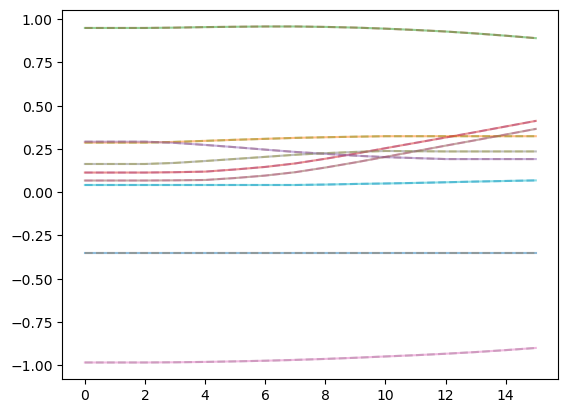

True


In [136]:
from pytorch3d.transforms import rotation_6d_to_matrix, matrix_to_rotation_6d, matrix_to_axis_angle
import torch
batch = dataset[3]
abs_batch = abs_dataset[3]
abs_actions = abs_batch["action"][...,:-1]

actions = batch["action"][...,:-1]
ref_obs = batch["obs"]["robot_eef_pose_6d_rot"][-1]
print(ref_obs.shape)

# convert rel_obs to a se3 matrix 
rel_position =  ref_obs[:3]
rel_rot6d  = ref_obs[3:]
rel_rot = rotation_6d_to_matrix(rel_rot6d).squeeze(0)
ref_se3 = torch.eye(4)
ref_se3[:3, :3] = rel_rot
ref_se3[:3, 3] = rel_position

# convert the relative actions to se3
rel_position = actions[:, :3]
rel_rot6d  = actions[:, 3:]
rel_rot = rotation_6d_to_matrix(rel_rot6d).squeeze(1)
se3 = torch.eye(4).repeat(rel_position.shape[0], 1, 1)
se3[:, :3, :3] = rel_rot
se3[:, :3, 3] = rel_position

# convert the relative actions to absolute actions
abs_se3 = torch.matmul(ref_se3,se3)

reconstructed_abs_actions = torch.cat([abs_se3[:, :3, 3], matrix_to_rotation_6d(abs_se3[:, :3, :3])], dim=1)

# plot the actions
print(abs_actions.shape)
print(reconstructed_abs_actions.shape)

plt.plot(abs_actions, alpha=0.5, linestyle="--")
plt.plot(reconstructed_abs_actions, alpha=0.5)
plt.show()

# check if both match
print(torch.allclose(abs_actions, reconstructed_abs_actions, atol=1e-6))





## checking the vision backbone

In [20]:
from diffusion_policy.model.vision.timm_model import TimmRGBModel

#model = TimmRGBModel("resnet34.a1_in1k", ( 64, 64))
model = TimmRGBModel("convnext_femto.d1_in1k", ( 64, 64))


import torch
b = torch.zeros(6,3,64,64)
f = model(b)
print(f.shape)


torch.Size([6, 384])


In [15]:
#model = TimmRGBModel("vit_base_patch16_clip_224.openai", (3, 224, 224),feature_aggregation="avg")
model = TimmRGBModel("vit_small_patch16_224.dino", (224, 224),feature_aggregation="avg")
import torch
b = torch.zeros(6,3,224,224)
f = model(b)
print(f.shape)

vit will use the CLS token. feature_aggregation (avg) is ignored!


torch.Size([6, 384])


In [8]:
from diffusion_policy.model.vision.model_getter import get_resnet
model = get_resnet("resnet18","IMAGENET1K_V1")
f = model(b)
print(f.shape)

torch.Size([6, 512])


In [9]:
# build a multiImageObsencoder using the timm model
from diffusion_policy.model.vision.multi_image_obs_encoder import MultiImageObsEncoder
shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [9],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [10]
    }
}
encoder = MultiImageObsEncoder(shape_meta,model,(240,320),crop_shape=(224,224))





In [17]:
sample_obs_dict = {
    "camera_0": torch.zeros(6,3,240,320),
    "camera_1": torch.zeros(6,3,240,320),
    "robot_eef_pose_6d_rot": torch.zeros(6,9),
    "gripper_width": torch.zeros(6,1)
}
f = encoder(sample_obs_dict)
print(f.shape)

torch.Size([6, 1034])


In [20]:
print(encoder.output_shape())

torch.Size([1034])
